In [1]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [2]:
dataset_path = os.path.join(Path.cwd().parent, 'data', 'stackexchange_dataset.csv')
data = pd.read_csv(dataset_path,index_col='question_id')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 79802517 to 17945108
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   title                          100000 non-null  object 
 1   has_accepted_answer            100000 non-null  bool   
 2   accepted_answer_score          12000 non-null   float64
 3   time_to_accepted_answer_hours  12000 non-null   float64
 4   question_score                 100000 non-null  int64  
 5   question_text                  100000 non-null  object 
 6   num_tags                       100000 non-null  int64  
 7   tags                           100000 non-null  object 
 8   accepted_answer_id             12000 non-null   float64
 9   accepted_answer_length_chars   12000 non-null   float64
 10  accepted_answer_length_tokens  12000 non-null   float64
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 8.5+ MB


In [4]:
data.head()

,title,has_accepted_answer,accepted_answer_score,time_to_accepted_answer_hours,question_score,question_text,num_tags,tags,accepted_answer_id,accepted_answer_length_chars,accepted_answer_length_tokens
question_id,,,,,,,,,,,
79802517,Looking for a better way using &quot;.Include&...,False,NaN,NaN,2,I am looking for a better way to use the .Incl...,2,"['c#', 'entity-framework']",NaN,NaN,NaN
79802934,NTP is moving my clock further from the correc...,False,NaN,NaN,0,Windows 11 Pro 10.0.26200 Build 26200. Dell XP...,1,['ntp'],NaN,NaN,NaN
79802909,Execution of pandas&#39; info in python,False,NaN,NaN,0,I am new to pandas library in python. When I l...,2,"['python', 'pandas']",NaN,NaN,NaN
79802932,How to debug MongoDB recurring error 314 Objec...,False,NaN,NaN,0,On a fresh Mongo DB 8.0 mono instance (no clus...,4,"['database', 'mongodb', 'nosql', 'system-admin...",NaN,NaN,NaN
79802919,How to integrate QML UI into a custom Vulkan r...,False,NaN,NaN,0,I'm developing a custom Vulkan renderer and wa...,4,"['c++', 'qt', 'qml', 'vulkan']",NaN,NaN,NaN


In [5]:
data.index.is_unique

False

In [6]:
data[data.index.duplicated()].shape[0]

8

In [7]:
data[data.index.duplicated(keep=False)].head(4)

,title,has_accepted_answer,accepted_answer_score,time_to_accepted_answer_hours,question_score,question_text,num_tags,tags,accepted_answer_id,accepted_answer_length_chars,accepted_answer_length_tokens
question_id,,,,,,,,,,,
79802647,Paypal webhook simulator not firing,False,NaN,NaN,0,To test a PayPal integration that also reacts ...,2,"['paypal', 'webhooks']",NaN,NaN,NaN
79802647,Paypal webhook simulator not firing,False,NaN,NaN,0,To test a PayPal integration that also reacts ...,2,"['paypal', 'webhooks']",NaN,NaN,NaN
79789014,Can I use SSM to run command for SQL query exe...,False,NaN,NaN,-1,I want to automate a database drop and databas...,3,"['sql-server', 'amazon-web-services', 'aws-ssm']",NaN,NaN,NaN
79789014,Can I use SSM to run command for SQL query exe...,False,NaN,NaN,-1,I want to automate a database drop and databas...,3,"['sql-server', 'amazon-web-services', 'aws-ssm']",NaN,NaN,NaN


Since they are the same question, we drop them

In [8]:
data2 = data[~data.index.duplicated()]

In [9]:
data2.shape,data.shape

((99992, 11), (100000, 11))

In [10]:
data2.index.is_unique

True

---

## Answer acceptance rate

In [11]:
data2['question_score'].max(),data2['question_score'].min()

(np.int64(27487), np.int64(-20))

In [12]:
data2['has_accepted_answer'].where(data2['has_accepted_answer']==True).dropna().count(),data2['has_accepted_answer'].where(data2['has_accepted_answer']==False).dropna().count()

(np.int64(39938), np.int64(60054))

Huge disproportion in the data in regards to accepted answer

In [13]:
data_acc = data2[data2['has_accepted_answer']]

In [14]:
data_acc.shape

(39938, 11)

In [15]:
data_acc[data_acc['time_to_accepted_answer_hours'].notna()].shape

(12000, 11)

Out of those 39938 questions, only 12000 has accepted answer

In [16]:
data_aac = data_acc[data_acc['time_to_accepted_answer_hours'].notna()]
data_aac.shape

(12000, 11)

In [17]:
data_aac

,title,has_accepted_answer,accepted_answer_score,time_to_accepted_answer_hours,question_score,question_text,num_tags,tags,accepted_answer_id,accepted_answer_length_chars,accepted_answer_length_tokens
question_id,,,,,,,,,,,
1562367,How do short URLs services work?,True,242.0,0.499167,119,How do services like TinyURL or Metamark work?...,5,"['web-services', 'url', 'url-shortener', 'bit....",1562539.0,3442.0,409.0
79802633,How to import based on variable to avoid loadi...,True,1.0,2.591667,0,Using React Native+Expo I'm trying to load onl...,5,"['javascript', 'reactjs', 'node.js', 'typescri...",79802815.0,1290.0,152.0
79801576,Is std::unique_ptr needed on abstract class wh...,True,1.0,10.045833,1,I came across below code in a project I am wor...,5,"['c++', 'c++20', 'unique-ptr', 'std-function',...",79802123.0,3496.0,426.0
46853200,How to make zsh&#39;s REPORTTIME work? (time f...,True,8.0,2.211667,6,This is my .zshrc: export REPORTTIME=3 When I ...,1,['zsh'],46855194.0,1945.0,245.0
2711001,How to apply shell command to each line of a c...,True,347.0,0.055000,328,Suppose I have some output from a command (suc...,1,['bash'],2711011.0,433.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...
25045932,Fake DbFunctions DiffDays,True,0.0,6541.563889,1,I am trying to fake DbFunctions.DiffDays but a...,2,"['c#', 'unit-testing']",29939853.0,277.0,28.0
71355883,Next-Auth Signout within jwt callback,True,20.0,481.200556,10,If a user is signed into the app between app u...,4,"['javascript', 'reactjs', 'next.js', 'next-auth']",71608606.0,1410.0,185.0
78467875,freeing allocated memory returned from functio...,True,-1.0,0.244444,-1,If I have a function like this: char* f1(char ...,3,"['c++', 'memory-management', 'memory-leaks']",78467920.0,1138.0,134.0


---

## Data distribution of time to accepted answer

In [18]:
from sklearn.mixture import GaussianMixture

In [19]:
time_to_accepted_answer_log_hours = np.log(data_aac['time_to_accepted_answer_hours'] + 1.0e-5).dropna().values.reshape(-1,1)

In [20]:
model = GaussianMixture(n_components=3, random_state=0)
model.fit(time_to_accepted_answer_log_hours)

GaussianMixture(n_components=3, random_state=0)

/home/m_zsuetam/anaconda3/envs/de313/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


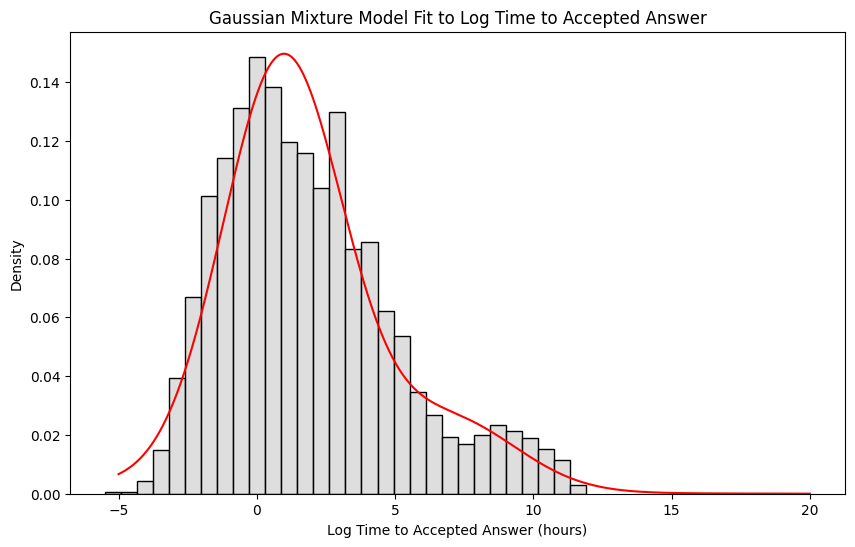

In [21]:
x_vals = np.linspace(-5,20,1000).reshape(-1,1)
log_y_preds = model.score_samples(x_vals)
y_preds = np.exp(log_y_preds)

plt.figure(figsize=(10,6))
sns.histplot(np.log(data_aac['time_to_accepted_answer_hours']), bins=30, kde=False, stat='density', color='lightgray')
plt.plot(x_vals, y_preds, color='red')
plt.xlabel('Log Time to Accepted Answer (hours)')
plt.ylabel('Density')
plt.title('Gaussian Mixture Model Fit to Log Time to Accepted Answer')
plt.show()

/home/m_zsuetam/anaconda3/envs/de313/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


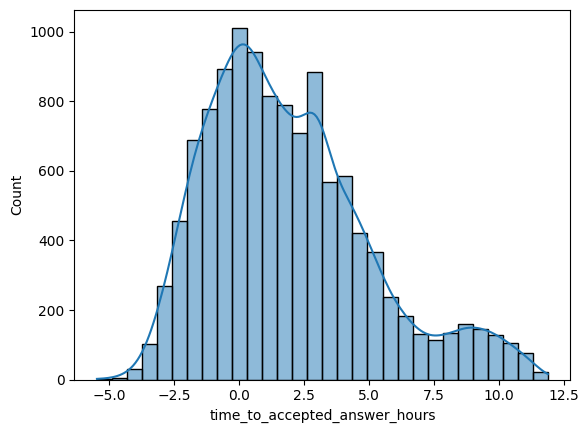

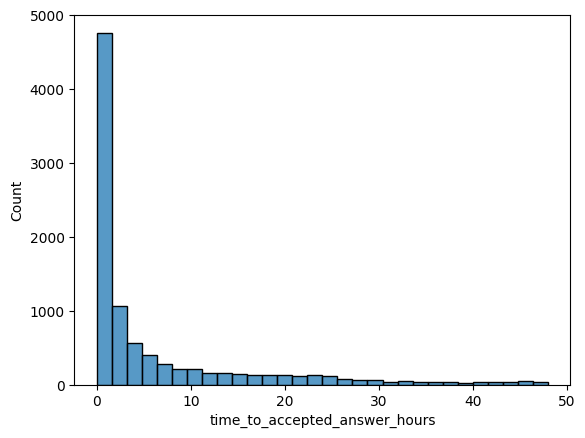

In [22]:
sns.histplot(np.log(data_aac['time_to_accepted_answer_hours']), bins=30, kde=True)
plt.show()

selected_data = data_aac['time_to_accepted_answer_hours']
sns.histplot(selected_data[selected_data < 48], bins=30)
plt.show()

Clearly the distribution is multimodal. For now I think it's best to assume exponential (or poisson) distribution.  
Maybe we can use embedding on the question body and see if we can cluster them into different unimodal distributions.  
Tags may be misleading, since python question can be about some trivial issue or some advanced topic.

---

## Tags analysis

In [23]:
import ast

In [24]:
ANALYZE_ONLY_AAC = False
data_ = data_aac if ANALYZE_ONLY_AAC else data2

In [25]:
tags=data_[['tags','num_tags']]
tags.loc[:,('tags')] = tags.loc[:,('tags')].apply(ast.literal_eval)


In [26]:
tags.iloc[0]['tags']

['c#', 'entity-framework']

In [27]:
tag_counter = Counter(tag for tags in tags['tags'] for tag in tags)
tag_freq = pd.Series(tag_counter).sort_values(ascending=False)

In [28]:
tag_freq

python            11489
javascript         7369
java               6436
c#                 5215
android            4707
                  ...  
gocardless            1
mosek                 1
aws-powershell        1
radial                1
networkd3             1
Length: 22753, dtype: int64

### Problem: Extreme Multi-label Classification

As seen above, there are $7684$ unique tags. This is too big for a classification problem.

We can use:
- Frequency-Based Filtering
    - Keep only the top `N` most frequent tags
- "Semantic Compression" using Embeddings and Clustering
  - Use embeddings and clustering to group them
- Focus on Specific Tags
  - Limit the scope to a subset of tags relevant to our analysis – e.g. **top N programming languages**


### Focus on the tags representing the best **programming languages**

In [29]:
with open('programmin-langs.txt') as f:
    langs = f.readlines()

# unfortunately :(
langs.append('html')
langs.append('css')

langs = pd.Series(langs).str.strip()
langs = langs.str.extract(r'^([^\(–,]+)')[0].dropna().str.strip()
langs
# langs.values

0           A.NET
1      A-0 System
2              A+
3            ABAP
4             ABC
          ...    
674        Zonnon
675          ZOPL
676           ZPL
677          html
678           css
Name: 0, Length: 679, dtype: object

In [30]:
tag_is_lang = tag_freq.index.str.lower().map(lambda x: langs.str.lower().apply(lambda y: y==x).any())

Number of popular programming language tags (>2000.0): 9
Minimum number of questions for a popular programming language tag (>2000.0): 2062


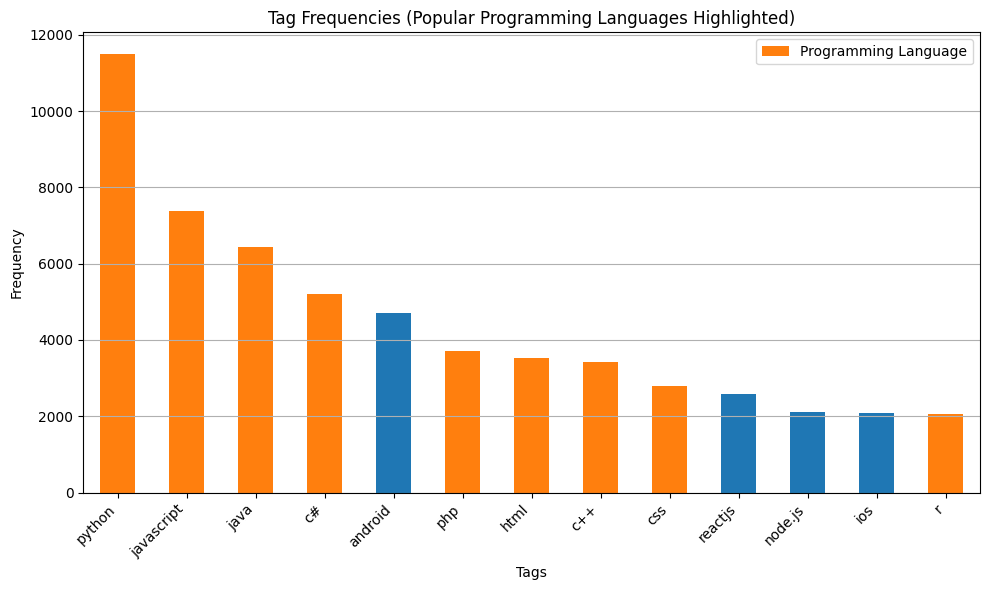

In [31]:
tresh = 2e3

selected = tag_freq[tag_is_lang & (tag_freq > tresh)]
k_classes = selected.shape[0]
print(f'Number of popular programming language tags (>{tresh}): {k_classes}')

min_questions_per_class = selected.min()
print(f'Minimum number of questions for a popular programming language tag (>{tresh}): {min_questions_per_class}')

tag_freq[tag_freq > tresh].plot(
    kind='bar', 
    figsize=(10,6),
    color=tag_is_lang[tag_freq > tresh].map({True: 'tab:orange', False: 'tab:blue'})
)
plt.title('Tag Frequencies (Popular Programming Languages Highlighted)')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(['Programming Language'])
plt.show()

In [32]:
selected_langs = selected.index.tolist()
print('Popular programming languages tags selected ({}):'.format(len(selected_langs)))
selected_langs

Popular programming languages tags selected (9):


['python', 'javascript', 'java', 'c#', 'php', 'html', 'c++', 'css', 'r']

In [33]:
selected_tags = tags.tags.apply(lambda tag_list: list(set(tag_list) & set(selected_langs))) \
    .apply(lambda x: x if len(x)>0 else None).dropna()
selected_tags.head()

question_id
79802517        [c#]
79802909    [python]
79802919       [c++]
79802892      [java]
79802796    [python]
Name: tags, dtype: object

Getting the question x tag matrix

In [34]:
tgs = pd.get_dummies(selected_tags.explode())
tgs = tgs.groupby(level=0).any()

tgs

,c#,c++,css,html,java,javascript,php,python,r
question_id,,,,,,,,,
2530,False,False,False,True,False,False,False,False,False
3284,True,False,False,False,False,False,False,False,False
3881,False,False,False,False,True,False,False,False,False
3978,False,False,False,False,False,False,True,False,False
7477,False,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
79802892,False,False,False,False,True,False,False,False,False
79802895,False,False,False,False,False,False,False,False,True
79802906,False,False,False,False,False,True,False,True,False


In [35]:
print(f'Number of questions with popular programming language tags (>{tresh}): {tgs.shape[0]}')
print()
print('Distribution of number of programming language tags per question:')
tgs.sum(axis=1).value_counts()

Number of questions with popular programming language tags (>2000.0): 42037

Distribution of number of programming language tags per question:


1    38547
2     3015
3      464
4       11
Name: count, dtype: int64

<Axes: >

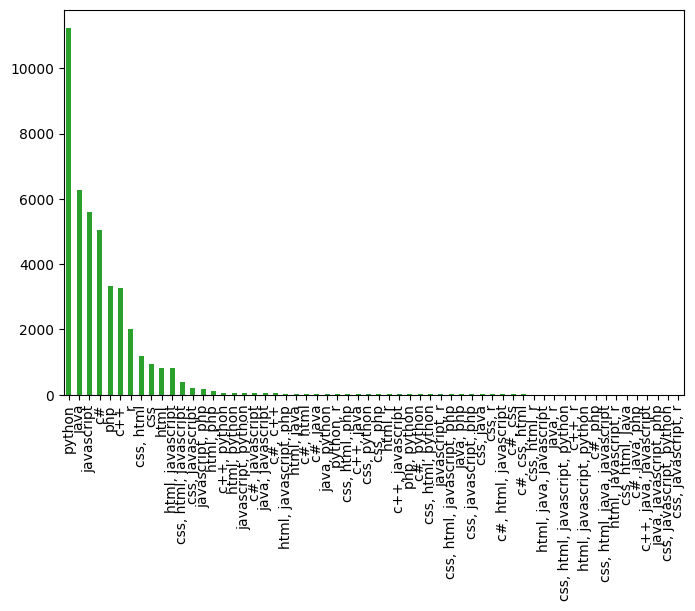

In [36]:
tgs.apply(lambda row: ', '.join(row.index[row].tolist()), axis=1).value_counts().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8,5),
    color='tab:green'
)

# this is similar to the previous distribution

---

# Score

<Axes: xlabel='question_score'>

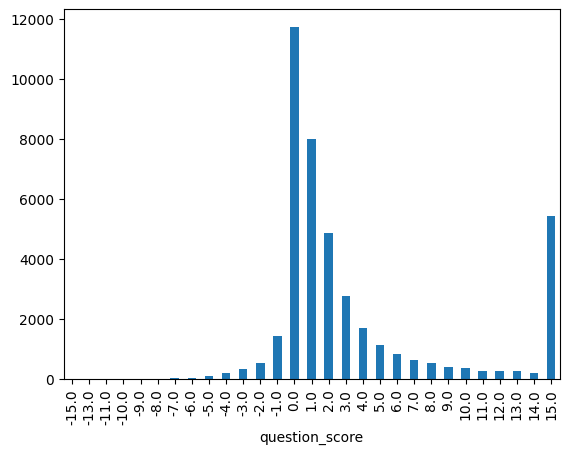

In [37]:
tresh = 15
data_.loc[tgs.index].question_score.apply(lambda x: x if abs(x)<=tresh else x/abs(x)*tresh).value_counts().sort_index().plot(kind='bar')

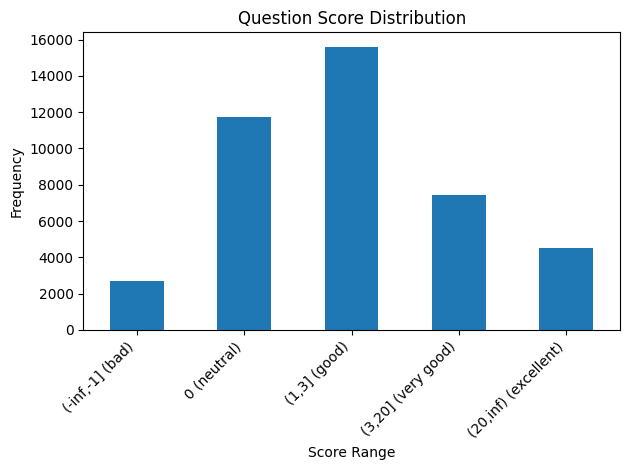

In [42]:
eps = 1e-3
bins = [-np.inf, 0-eps , 0, 3, 20,np.inf]
lbs = ['(-inf,-1] (bad)', '0 (neutral)' ,'(1,3] (good)','(3,20] (very good)','(20,inf) (excellent)']
bin_labels = pd.cut(data.loc[tgs.index].question_score,bins,labels=lbs)
bin_labels.value_counts().sort_index().plot(
    kind='bar',
    title='Question Score Distribution',
    xlabel='Score Range',
    ylabel='Frequency',
    colormap='tab10'
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---

# Conclusions

- Answer based analysis – we discarded a lot of data (questions without accepted answer)
- Tags analysis – we focused only on the most popular programming languages, which is an interesting subset.
  - we could use some random other tags to define the 'other' category
- Question score distribution – the distribution is not uniform, but we can try to predict it.